In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/training_set_features.csv
/kaggle/input/dataset/test_set_features.csv
/kaggle/input/dataset/training_set_labels.csv


# Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [16]:
train1=pd.read_csv(r"/kaggle/input/dataset/training_set_features.csv")
train1.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [97]:
train_labels=pd.read_csv(r"/kaggle/input/dataset/training_set_labels.csv")
train_labels.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [18]:
train=pd.merge(train1,train_labels,on='respondent_id',how='outer')
train

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


After analysing the data we got to know that "health_insurance","employment_industry","employment_occupation" has cloe to 50 percent of null values hence we need to remove the column to avoid loss of data of other columns

In [19]:
train.drop(["health_insurance","employment_industry","employment_occupation"],axis=1,inplace=True)

Dropping the columns that have null values as the null percent is less than 1%

In [20]:
for i in train.columns:
   train.dropna(subset=[i],inplace=True)

In [21]:
categorical_data = train.select_dtypes(exclude=[np.number])

In [22]:
#ENCODING THE CATEGORICAL DATA
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_data.columns:
   train[i] = le.fit_transform(train[i])

MAKING TWO TARGET COLUMNS FOR EASE OF PREDICTION

In [23]:
y1=train['xyz_vaccine']
y2=train['seasonal_vaccine']

In [53]:
x

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3,0,2,1,0,1,8,2,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,1,2,1,1,0,1,0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,0,2,1,1,1,5,1,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,0,0,0,0,0,9,0,1.0,0.0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3,1,0,0,0,0,0,1,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,3,0,1,0,0,1,6,1,1.0,0.0
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3,0,1,1,1,1,3,1,3.0,0.0
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3,0,0,1,0,1,9,2,0.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,1,0,1,1,0,6,1,1.0,0.0


In [24]:
x=train.drop(["xyz_vaccine","seasonal_vaccine","respondent_id"],axis=1)

### Making count of unique values of the columns

In [96]:
for i in x.columns:
    print(x[i].value_counts())

xyz_concern
2.0    7989
1.0    6229
3.0    3175
0.0    2249
Name: count, dtype: int64
xyz_knowledge
1.0    10861
2.0     7362
0.0     1419
Name: count, dtype: int64
behavioral_antiviral_meds
0.0    18671
1.0      971
Name: count, dtype: int64
behavioral_avoidance
1.0    14544
0.0     5098
Name: count, dtype: int64
behavioral_face_mask
0.0    18312
1.0     1330
Name: count, dtype: int64
behavioral_wash_hands
1.0    16399
0.0     3243
Name: count, dtype: int64
behavioral_large_gatherings
0.0    12703
1.0     6939
Name: count, dtype: int64
behavioral_outside_home
0.0    13159
1.0     6483
Name: count, dtype: int64
behavioral_touch_face
1.0    13455
0.0     6187
Name: count, dtype: int64
doctor_recc_xyz
0.0    15203
1.0     4439
Name: count, dtype: int64
doctor_recc_seasonal
0.0    13091
1.0     6551
Name: count, dtype: int64
chronic_med_condition
0.0    14066
1.0     5576
Name: count, dtype: int64
child_under_6_months
0.0    17995
1.0     1647
Name: count, dtype: int64
health_worker
0.0  

## Making Plot of some important features with the target variables

In [101]:
px.histogram(train, x="xyz_concern", title='xyz_concern vs. seasonal_vaccine taken or not', color='seasonal_vaccine')


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [102]:
px.histogram(train, x="xyz_concern", title='xyz_concern vs. xyz_vaccine taken or not', color='xyz_vaccine')


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [108]:
px.histogram(train, x="doctor_recc_seasonal", title='doctor_recc_seasonal vs. xyz_vaccine taken or not', color='xyz_vaccine')


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [109]:
px.histogram(train, x="doctor_recc_seasonal", title='doctor_recc_seasonal vs. xyz_vaccine taken or not', color='xyz_vaccine')


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [110]:
px.histogram(train, x="opinion_seas_risk", title='opinion_seas_risk vs. xyz_vaccine taken or not', color='xyz_vaccine')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [111]:
px.histogram(train, x="opinion_seas_risk", title='opinion_seas_risk vs.  seasonal_vaccine taken or not', color='seasonal_vaccine')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [94]:
x.corr()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
xyz_concern,1.000000,0.059023,0.090782,0.235204,0.162740,0.293807,0.264525,0.252513,0.249776,0.157154,...,-0.138008,-0.140634,0.051541,-0.037674,0.001543,0.063658,-0.007306,0.001952,-0.016045,0.048792
xyz_knowledge,0.059023,1.000000,-0.007402,0.071382,0.037583,0.084454,-0.044571,-0.069281,0.085656,0.090628,...,0.159728,-0.090490,-0.048729,-0.119238,-0.129561,-0.130574,-0.021312,-0.059204,0.012606,0.053608
behavioral_antiviral_meds,0.090782,-0.007402,1.000000,0.045012,0.145122,0.059663,0.106117,0.124120,0.064138,0.057030,...,-0.119113,-0.012273,0.073540,0.019969,0.072057,0.009879,0.012575,0.016787,0.041534,0.080335
behavioral_avoidance,0.235204,0.071382,0.045012,1.000000,0.061104,0.336035,0.227655,0.223418,0.328064,0.065566,...,-0.003287,-0.124459,0.005424,-0.056189,-0.033846,0.026455,0.003571,-0.023196,0.013944,0.039898
behavioral_face_mask,0.162740,0.037583,0.145122,0.061104,1.000000,0.077821,0.181502,0.167205,0.107283,0.091775,...,-0.088761,-0.048235,0.049560,0.005343,0.053974,0.036373,0.014778,-0.004213,0.016216,0.005850
behavioral_wash_hands,0.293807,0.084454,0.059663,0.336035,0.077821,1.000000,0.193549,0.191407,0.365312,0.087836,...,-0.067637,-0.168138,0.019699,-0.048730,-0.022973,0.003264,-0.006445,-0.011314,0.006272,0.041377
behavioral_large_gatherings,0.264525,-0.044571,0.106117,0.227655,0.181502,0.193549,1.000000,0.587728,0.244823,0.084759,...,-0.122248,-0.056706,0.023563,0.025693,0.055086,0.145750,0.016796,0.047392,-0.032031,-0.010426
behavioral_outside_home,0.252513,-0.069281,0.124120,0.223418,0.167205,0.191407,0.587728,1.000000,0.262231,0.070379,...,-0.139519,-0.044241,0.049328,0.029166,0.072339,0.156708,0.018861,0.033533,-0.027936,-0.010334
behavioral_touch_face,0.249776,0.085656,0.064138,0.328064,0.107283,0.365312,0.244823,0.262231,1.000000,0.088636,...,-0.059859,-0.178853,-0.001153,-0.038495,-0.021259,0.028547,-0.000596,0.008451,-0.002907,0.020962
doctor_recc_xyz,0.157154,0.090628,0.057030,0.065566,0.091775,0.087836,0.084759,0.070379,0.088636,1.000000,...,-0.018952,-0.048523,0.023225,-0.021643,0.000117,0.022387,-0.021589,-0.000143,0.001079,0.024370


### As we can see that there is a very little correlation of data with each other

In [115]:
train.xyz_vaccine.value_counts()

xyz_vaccine
0    15128
1     4514
Name: count, dtype: int64

# As it is a very imbalanced data set we will find out the best cross validation score nd pick the best model with **Stratified Cross Validation** T

In [25]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
# Initialize models and their hyperparameters
classifiers = {
    'Logistic Regression': (LogisticRegression(solver='liblinear'), {
        'C': [0.1, 1, 10]
    }),
    'Support Vector Machine': (SVC(probability=True), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 10, 20]
    }),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    }),
    'SGD Classifier': (SGDClassifier(loss='log', max_iter=1000, tol=1e-3), {
        'alpha': [0.0001, 0.001, 0.01],
        'penalty': ['l2', 'l1', 'elasticnet']
    }),
    
}


In [15]:
# Set up stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to hold results
results = {}

# Perform stratified cross-validation with hyperparameter tuning for each model
for model_name, (model, params) in classifiers.items():
    grid_search = GridSearchCV(model, params, scoring='roc_auc', cv=skf, n_jobs=-1)
    grid_search.fit(x,y1)
    
    # Best model and its cross-validation AUC score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    results[model_name] = {
        'best_params': best_params,
        'cv_auc': best_score
    }

# Print results
for model_name, result in results.items():
    print(f"{model_name} - Best Params: {result['best_params']}, Cross-Validation AUC: {result['cv_auc']:.4f}")


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skle

Logistic Regression - Best Params: {'C': 1}, Cross-Validation AUC: 0.8391
Support Vector Machine - Best Params: {'C': 10, 'kernel': 'linear'}, Cross-Validation AUC: 0.8367
Random Forest - Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}, Cross-Validation AUC: 0.8412
XGBoost - Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}, Cross-Validation AUC: 0.8456
SGD Classifier - Best Params: {'alpha': 0.0001, 'penalty': 'l1'}, Cross-Validation AUC: 0.8371
Decision Tree - Best Params: {'max_depth': 10, 'min_samples_split': 20}, Cross-Validation AUC: 0.7888


In [26]:
# Set up stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to hold results
results = {}

# Perform stratified cross-validation with hyperparameter tuning for each model
for model_name, (model, params) in classifiers.items():
    grid_search = GridSearchCV(model, params, scoring='roc_auc', cv=skf, n_jobs=-1)
    grid_search.fit(x,y2)
    
    # Best model and its cross-validation AUC score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    results[model_name] = {
        'best_params': best_params,
        'cv_auc': best_score
    }

# Print results
for model_name, result in results.items():
    print(f"{model_name} - Best Params: {result['best_params']}, Cross-Validation AUC: {result['cv_auc']:.4f}")


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skle

Logistic Regression - Best Params: {'C': 10}, Cross-Validation AUC: 0.8531
Support Vector Machine - Best Params: {'C': 1, 'kernel': 'rbf'}, Cross-Validation AUC: 0.8590
Random Forest - Best Params: {'max_depth': 20, 'min_samples_split': 20, 'n_estimators': 300}, Cross-Validation AUC: 0.8592
XGBoost - Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}, Cross-Validation AUC: 0.8629
SGD Classifier - Best Params: {'alpha': 0.001, 'penalty': 'elasticnet'}, Cross-Validation AUC: 0.8522


In [45]:
test=pd.read_csv("/kaggle/input/dataset/test_set_features.csv")

In [46]:
test

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [47]:
test.isnull().sum()

respondent_id                      0
xyz_concern                       85
xyz_knowledge                    122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_xyz_vacc_effective       398
opinion_xyz_risk                 380
opinion_xyz_sick_from_vacc       375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [48]:
test.drop(["health_insurance","employment_industry","employment_occupation"],axis=1,inplace=True)

In [49]:
x_test=test.drop(['respondent_id'],axis=1)

In [50]:
x_test.isnull().sum()

xyz_concern                      85
xyz_knowledge                   122
behavioral_antiviral_meds        79
behavioral_avoidance            213
behavioral_face_mask             19
behavioral_wash_hands            40
behavioral_large_gatherings      72
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_xyz_vacc_effective      398
opinion_xyz_risk                380
opinion_xyz_sick_from_vacc      375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4497
marital_status                 1442
rent_or_own                    2036
employment_status           

In [ ]:
x_test

In [51]:
for i in x_test.columns:
   x_test[i]=x_test[i].fillna(x_test[i].mode()[0])
categorical_data = x_test.select_dtypes(exclude=[np.number])
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_data.columns:
   x_test[i] = le.fit_transform(x_test[i])

In [52]:
x_test

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,0,1,1,1,0,7,0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,2,1,1,0,1,2,3.0,0.0
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,3,1,1,0,0,0,5,2,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3,0,0,0,0,1,5,0,1.0,0.0
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,1,0,0,6,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,3,0,0,0,0,0,2,1,1.0,1.0
26704,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,3,1,2,0,1,0,9,2,1.0,3.0
26705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0,2,1,1,1,9,0,1.0,0.0
26706,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,0,0,0,0,1,1,0,1.0,0.0


In [54]:
import numpy as np
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.datasets import make_classification

In [58]:
xgb_model = XGBClassifier(use_label_encoder=False, 
                          eval_metric='logloss', 
                          learning_rate=0.2, 
                          max_depth=3, 
                          n_estimators=100)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [59]:
xgb_model.fit(x, y1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [60]:
y_test_pred_proba = xgb_model.predict_proba(x_test)[:, 1]

In [61]:
test_predictions_df = pd.DataFrame({'y_test_pred_proba': y_test_pred_proba})

In [63]:
test_predictions_df

,y_test_pred_proba
0,0.112170
1,0.013824
2,0.515460
3,0.629498
4,0.323221
...,...
26703,0.319443
26704,0.184929
26705,0.092017
26706,0.035595


In [62]:
test_predictions_df.to_csv('y_test_pred_proba.csv')

Now the second prediction

In [64]:
xgb_model = XGBClassifier(use_label_encoder=False, 
                          eval_metric='logloss', 
                          learning_rate=0.1, 
                          max_depth=3, 
                          n_estimators=300)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [65]:
xgb_model.fit(x, y2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [66]:
y_test_pred_proba2 = xgb_model.predict_proba(x_test)[:, 1]

In [67]:
test_predictions_df2 = pd.DataFrame({'y_test_pred_proba2': y_test_pred_proba2})

In [68]:
test_predictions_df2.to_csv('y_test_pred_proba2.csv')

In [69]:
test_predictions_df2

,y_test_pred_proba2
0,0.207390
1,0.049247
2,0.832906
3,0.862487
4,0.383474
...,...
26703,0.436826
26704,0.286915
26705,0.180717
26706,0.397526


In [78]:
test_predictions_df['respondent_id'] = range(26707, 26707 + len(test_predictions_df))

test_predictions_df

,y_test_pred_proba,respondent_id
0,0.112170,26707
1,0.013824,26708
2,0.515460,26709
3,0.629498,26710
4,0.323221,26711
...,...,...
26703,0.319443,53410
26704,0.184929,53411
26705,0.092017,53412
26706,0.035595,53413


In [79]:
test_predictions_df2['respondent_id'] = range(26707, 26707 + len(test_predictions_df2))

test_predictions_df2

,y_test_pred_proba2,respondent_id
0,0.207390,26707
1,0.049247,26708
2,0.832906,26709
3,0.862487,26710
4,0.383474,26711
...,...,...
26703,0.436826,53410
26704,0.286915,53411
26705,0.180717,53412
26706,0.397526,53413


In [82]:
final=test_predictions_df2.merge(test_predictions_df,on="respondent_id",how='outer')
final

,y_test_pred_proba2,respondent_id,y_test_pred_proba
0,0.207390,26707,0.112170
1,0.049247,26708,0.013824
2,0.832906,26709,0.515460
3,0.862487,26710,0.629498
4,0.383474,26711,0.323221
...,...,...,...
26703,0.436826,53410,0.319443
26704,0.286915,53411,0.184929
26705,0.180717,53412,0.092017
26706,0.397526,53413,0.035595


In [83]:
final["seasonal_vaccine"]=test_predictions_df2['y_test_pred_proba2']

In [88]:
final = final.rename(columns={'y_test_pred_proba': 'xyz_vaccine'})

In [91]:
final

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.112170,0.207390
1,26708,0.013824,0.049247
2,26709,0.515460,0.832906
3,26710,0.629498,0.862487
4,26711,0.323221,0.383474
...,...,...,...
26703,53410,0.319443,0.436826
26704,53411,0.184929,0.286915
26705,53412,0.092017,0.180717
26706,53413,0.035595,0.397526


In [92]:
final.to_csv("submission.csv")

In [103]:
importances = xgb_model.feature_importances_

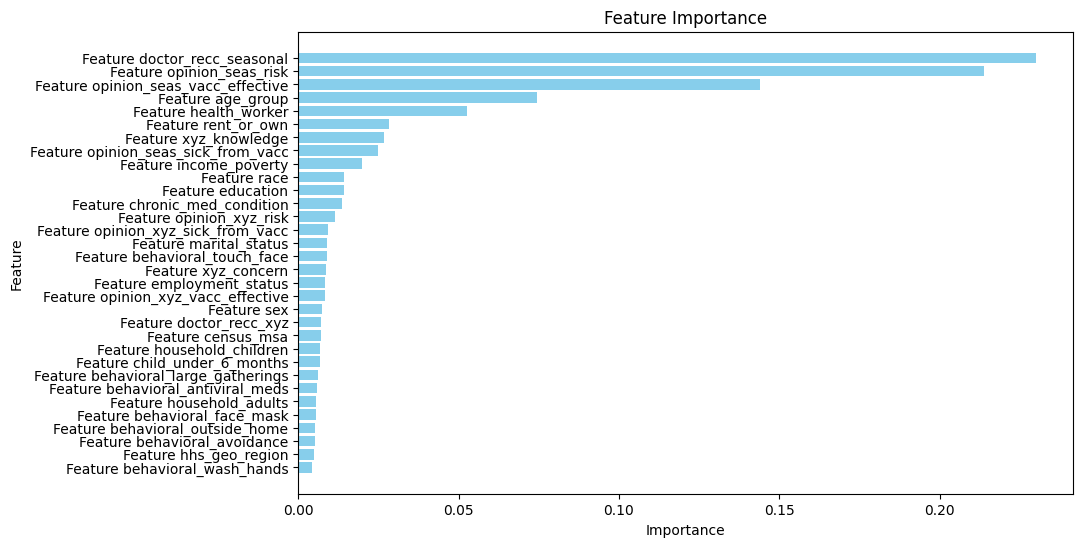

In [107]:
# Create a DataFrame to store feature names and their importance
features = pd.DataFrame({'Feature': [f'Feature {i}' for i in x_test.columns], 'Importance': importances})

# Sort the DataFrame by importance
features = features.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features['Feature'], features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()